In [3]:
#!/usr/bin/python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib import urlopen
import os
import csv
import scipy.stats

%matplotlib inline

In [5]:
ParentDirectory = os.getcwd()
inputfile_g = os.path.join(ParentDirectory, "green_tripdata_2015-01.csv")
#inputfile_y = os.path.join(ParentDirectory, "yellow_tripdata_2015-01.csv")

#ydf = pd.read_csv(open(inputfile_y))
gdf = pd.read_csv(open(inputfile_g))

In [6]:
#################
# Show the first rows of the yellow taxi data
#################
gdf.head()

VendorID lpep_pickup_datetime  \
2 2015-01-01 00:34:42  2015-01-01 00:38:34                    N   
  2015-01-01 00:34:46  2015-01-01 00:47:23                    N   
1 2015-01-01 00:34:44  2015-01-01 00:38:15                    N   
2 2015-01-01 00:34:48  2015-01-01 00:38:08                    N   
  2015-01-01 00:34:53  2015-01-01 01:09:10                    N   

                       Lpep_dropoff_datetime  Store_and_fwd_flag  RateCodeID  \
2 2015-01-01 00:34:42                      1          -73.922592   40.754528   
  2015-01-01 00:34:46                      1          -73.952751   40.677711   
1 2015-01-01 00:34:44                      1          -73.843010   40.719055   
2 2015-01-01 00:34:48                      1          -73.860825   40.757793   
  2015-01-01 00:34:53                      1          -73.945183   40.783321   

                       Pickup_longitude  Pickup_latitude  Dropoff_longitude  \
2 2015-01-01 00:34:42        -73.913635        40.765522                  1   
  2015-01-01 00:34:46        -73.981529        40.658978                  1   
1 2015-01-01 00:34:44        -73.846581        40.711567                  1   
2 2015-01-01 00:34:48        -73.854042        40.749821                  1   
  2015-01-01 00:34:53        -73.989624        40.765450                  1   

                       Dropoff_latitude  Passenger_count     ...      \
2 2015-01-01 00:34:42              0.88              5.0     ...       
  2015-01-01 00:34:46              3.08             12.0     ...       
1 2015-01-01 00:34:44              0.90              5.0     ...       
2 2015-01-01 00:34:48              0.85              5.0     ...       
  2015-01-01 00:34:53              4.91             24.5     ...       

                       Fare_amount  Extra  MTA_tax  Tip_amount  Tolls_amount  \
2 2015-01-01 00:34:42          0.5    0.0      0.0         NaN           0.3   
  2015-01-01 00:34:46          0.5    0.0      0.0         NaN           0.3   
1 2015-01-01 00:34:44          0.5    1.8      0.0         NaN           0.0   
2 2015-01-01 00:34:48          0.5    0.0      0.0         NaN           0.3   
  2015-01-01 00:34:53          0.5    0.0      0.0         NaN           0.3   

                       Ehail_fee  improvement_surcharge  Total_amount  \
2 2015-01-01 00:34:42        6.3                      2           1.0   
  2015-01-01 00:34:46       13.3                      2           1.0   
1 2015-01-01 00:34:44        7.8                      1           1.0   
2 2015-01-01 00:34:48        6.3                      2           1.0   
  2015-01-01 00:34:53       25.8                      2           1.0   

                       Payment_type  Trip_type   
2 2015-01-01 00:34:42           NaN         NaN  
  2015-01-01 00:34:46           NaN         NaN  
1 2015-01-01 00:34:44           NaN         NaN  
2 2015-01-01 00:34:48           NaN         NaN  
  2015-01-01 00:34:53           NaN         NaN  

[5 rows x 21 columns]

In [7]:
#################
# Extract the coordinates of each pick-up
#################
#pydf = ydf[['pickup_latitude','pickup_longitude']]
pgdf = gdf[['Pickup_latitude','Pickup_longitude']]

#################
# Show the first rows of the green taxi location data
#################
print "Green taxis"
print "Number of rows: %i" % pgdf.shape[0]
pgdf.head()

#################
# Show the first rows of the yellow taxi location data
#################
#print "Yellow taxis"
#print "Number of rows: %i" % pydf.shape[0]
#pydf.head()

Green taxis
Number of rows: 1508501


Pickup_latitude  Pickup_longitude
2 2015-01-01 00:34:42        40.765522        -73.913635
  2015-01-01 00:34:46        40.658978        -73.981529
1 2015-01-01 00:34:44        40.711567        -73.846581
2 2015-01-01 00:34:48        40.749821        -73.854042
  2015-01-01 00:34:53        40.765450        -73.989624

/usr/local/anaconda/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:13: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


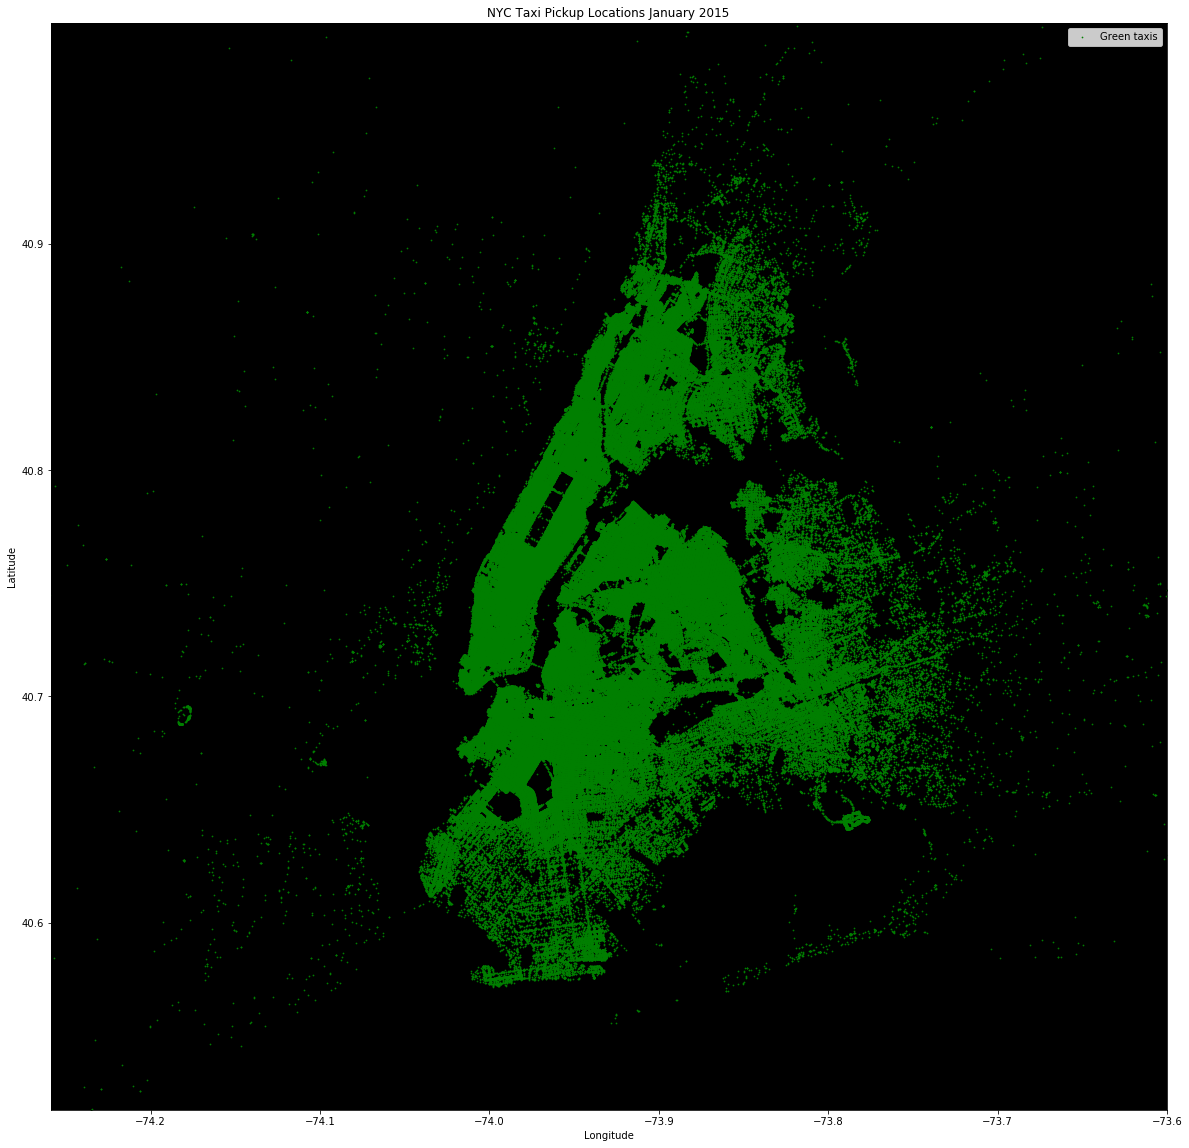

In [8]:
#################
# Make a scatter plot of the yellow and green taxi location data
#################
fig = plt.figure(figsize=(20,20))
plt.scatter(pgdf['Pickup_longitude'], pgdf['Pickup_latitude'], color='green', s=0.5, label='Green taxis')
#plt.scatter(pydf['pickup_longitude'], pydf['pickup_latitude'], color='yellow', s=0.5, label='Yellow taxis')
plt.title('NYC Taxi Pickup Locations January 2015')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-74.259090,-73.600272)#-74.259090,-73.700272)
plt.ylim(40.517399, 40.997577)#40.477399, 40.917577)
#plt.grid()
plt.gca().set_axis_bgcolor('black')
plt.legend()
plt.show()